# Fecha de entrega: 24/09/2022 (corresponde a las clases 23/24)

# Algoritmos de boosting

# Diccionario

**BTC_various_indicators_fv**

- **Date**: fecha en YYYY-MM-DD (object [ns])
- **Price**: precio de cierre de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
- **Open**: precio de apertura de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
- **High**: precio más alto de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
- **Low**: precio más bajo de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
- **Vol.**: volumen de BTC (Número de intercambios) en el día de la fecha (float) (Variable numérica continua)
- **Percentage_diff**: diferencia porcentual del precio de BTC en la fecha [x+1] con respecto a la fecha [x] (float) (Variable numérica continua) 
- **Target**: 1 indica que en el día de la fecha el precio de BTC subió, y 0 que el precio bajó (float) (Se la tratará como variable categórica)
- **Price_gold**: indica el precio de cierre del oro en el día de la fecha (float) (USD) (variable numérica continua)
- **Price_copper**: indica el precio de cierre del cobre en el día de la fecha (float) (USD) (variable numérica continua)
- **Price_aluminium**: indica el precio de cierre del platino en el día de la fecha (float) (USD) (variable numérica 
- **Trend**: indica la tendencia de la serie de tiempo en relación con la variable [Price] (float) (variable numérica continua)
- **Residuals**: indica los residuales de la serie de tiempo en relación con la variable [Price] (float) (variable numérica continua)
- **EMA_7d**: media móvil exponencial de 7 días (USD) (float) (Variable numérica continua)
- **HT_TRENDLINE**: indicador de Hilbert Transform - Instantaneous Trendline (USD) (float) (Variable numérica continua)
- **BBANDS_upper_band**: banda superior del indicador Bandas de Bollinger (USD) (float) (Variable numérica continua)
- **BBANDS_middle_band**: banda media del indicador Bandas de Bollinger (USD) (float) (Variable numérica continua)
- **BBANDS_lower_band**: banda inferior del indicador Bandas de Bollinger (USD) (float) (Variable numérica continua)
- **PSAR**: indicador Parabolic SAR (USD) (float) (Variable numérica continua)Price_silver: indica el precio de cierre de la plata en el día de la fecha (float) (USD) (variable numérica continua)
- **EMA_7d_ET**: valores categóricos de la aplicación de la estrategia de trading EMA de 7 días (comprar, vender, mantener posición) (object) (Variable categórica)
- **HT_TRENDLINE_ET**: valores categóricos de la aplicación de la estrategia de trading HT Trendline (comprar, vender, mantener posición) (object) (Variable categórica)
- **PSAR_ET**: valores categóricos de la aplicación de la estrategia de trading PSAR (comprar, vender, mantener posición) (object) (Variable categórica)
- **ADX_PDM**: valores del Máximo Actual Menos el Máximo Anterior (+DM) (float) (Variable numérica continua)
- **ATR**: valores del indicador Average True Range (Promedio de Rango Verdadero) (float) (Variable numérica continua)
- **Linearregression**: precio estimado por regresión lineal (USD) (float) (Variable numérica continua)
- **Linearintercept**: intercepción de la regresión lineal (USD) (float) (Variable numérica continua)
- **STDDEV**: desviación estándar (medición de la dispersión de los datos) (float) (Variable numérica continua)
- **Price_SP500**: indica el valor de cierre de la bolsa de valores S%P500 (USD) (Variable numérica continua)
- **Price_NASDAQ**: indica el valor de cierre de la bolsa de valores NASDAQ (USD) (float) (Variable numérica continua)
- **Price_DJ**: indica el valor de cierre de la bolsa de valores Dow Jones (USD) (float) (Variable numérica continua)

# Librerías

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas_profiling
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.cm import ScalarMappable

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('darkgrid')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

C:\Users\lucia\anaconda3\envs\acjup\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\lucia\anaconda3\envs\acjup\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# Data acquisition

In [2]:
def gdriveColabPath(sharing_url):
  file_id=sharing_url.split('/')[-2]
  dwn_url='https://drive.google.com/uc?id=' + file_id
  return dwn_url

## Adquiriendo BTC_various_indicators_fv

In [3]:
# Se carga la base de datos de BTC_various_indicators_fv desde la carpeta compartida en el Google Drive
sharing_url = "https://drive.google.com/file/d/12zbCtfvIQsTQdpbrVnjlhKgsBc5yxzwn/view?usp=sharing"

In [4]:
dwn_url=gdriveColabPath(sharing_url)
BTC_various_indicator_fv_df = pd.read_csv(dwn_url, sep=";", decimal=".")
BTC_various_indicator_fv_df.head()

,Date,Price,Open,High,Low,Vol.,Percentage_diff,Target,Price_gold,Price_copper,Price_aluminium,Trend,Residuals,EMA_7d,HT_TRENDLINE,BBANDS_upper_band,BBANDS_middle_band,BBANDS_lower_band,PSAR,ADX_PDM,ATR,Linearregression,Linearintercept,STDDEV,Price_SP500,Price_NASDAQ,Price_DJ,Comprar_EMA_7d_ET,Mantener_posicion_EMA_7d_ET,Vender_EMA_7d_ET,Comprar_HTTL_ET,Mantener_posicion_HTTL_ET,Vender_HTTL_ET,Comprar_PSAR_ET,Mantener_posicion_PSAR_ET,Vender_PSAR_ET
0,2014-06-23,591.2,603.6,604.7,582.9,2650.0,-2.06,0.0,1318.0,3.146,1892.5,NaN,NaN,598.498657,594.856768,606.556479,596.56,586.563521,610.10000,70.643884,23.740329,586.831429,622.440000,4.998240,1962.61,4368.68,16937.26,0,0,1,0,0,1,0,1,0
1,2014-06-24,588.8,591.2,595.7,585.4,3080.0,-0.41,0.0,1320.9,3.147,1901.0,NaN,NaN,596.073993,601.432180,605.083259,594.28,583.476741,610.10000,65.597892,22.780305,590.040000,609.688571,5.401629,1949.98,4350.35,16818.13,0,1,0,0,1,0,0,1,0
2,2014-06-25,568.5,588.8,589.6,566.9,3090.0,-3.45,0.0,1322.2,3.160,1903.5,NaN,NaN,589.180494,607.188235,613.466192,589.82,566.173808,606.15600,60.912329,22.774569,588.137143,600.948571,11.823096,1959.53,4379.76,16867.51,0,1,0,0,1,0,0,1,0
3,2014-06-26,582.7,568.5,582.7,565.8,4150.0,2.51,1.0,1316.1,3.161,1898.0,590.300000,15.543527,587.560371,610.918562,609.888969,586.96,564.031031,602.52752,56.561448,22.354957,585.457143,601.571429,11.464484,1957.22,4379.05,16846.13,0,1,0,0,1,0,0,1,0
4,2014-06-27,602.2,582.7,603.9,580.1,3390.0,3.35,1.0,1319.0,3.149,1885.0,596.571429,20.802061,591.220278,614.469470,608.809582,586.68,564.550418,560.80000,73.721345,22.458175,590.088571,595.782857,11.064791,1960.96,4397.93,16851.84,1,0,0,0,1,0,1,0,0


# Data wrangling

## Análisis pre-modelado

In [5]:
# Registros y columnas
BTC_various_indicator_fv_df.shape

(2949, 36)

In [6]:
# Nombre de columnas
BTC_various_indicator_fv_df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Percentage_diff',
       'Target', 'Price_gold', 'Price_copper', 'Price_aluminium', 'Trend',
       'Residuals', 'EMA_7d', 'HT_TRENDLINE', 'BBANDS_upper_band',
       'BBANDS_middle_band', 'BBANDS_lower_band', 'PSAR', 'ADX_PDM', 'ATR',
       'Linearregression', 'Linearintercept', 'STDDEV', 'Price_SP500',
       'Price_NASDAQ', 'Price_DJ', 'Comprar_EMA_7d_ET',
       'Mantener_posicion_EMA_7d_ET', 'Vender_EMA_7d_ET', 'Comprar_HTTL_ET',
       'Mantener_posicion_HTTL_ET', 'Vender_HTTL_ET', 'Comprar_PSAR_ET',
       'Mantener_posicion_PSAR_ET', 'Vender_PSAR_ET'],
      dtype='object')

In [7]:
# Tipos de datos de las variables
BTC_various_indicator_fv_df.dtypes

Date                            object
Price                          float64
Open                           float64
High                           float64
Low                            float64
Vol.                           float64
Percentage_diff                float64
Target                         float64
Price_gold                     float64
Price_copper                   float64
Price_aluminium                float64
Trend                          float64
Residuals                      float64
EMA_7d                         float64
HT_TRENDLINE                   float64
BBANDS_upper_band              float64
BBANDS_middle_band             float64
BBANDS_lower_band              float64
PSAR                           float64
ADX_PDM                        float64
ATR                            float64
Linearregression               float64
Linearintercept                float64
STDDEV                         float64
Price_SP500                    float64
Price_NASDAQ             

In [8]:
# Columnas y cantidad de registros
BTC_various_indicator_fv_df.count()

Date                           2949
Price                          2949
Open                           2949
High                           2949
Low                            2949
Vol.                           2949
Percentage_diff                2949
Target                         2949
Price_gold                     2949
Price_copper                   2949
Price_aluminium                2949
Trend                          2943
Residuals                      2943
EMA_7d                         2949
HT_TRENDLINE                   2949
BBANDS_upper_band              2949
BBANDS_middle_band             2949
BBANDS_lower_band              2949
PSAR                           2949
ADX_PDM                        2949
ATR                            2949
Linearregression               2949
Linearintercept                2949
STDDEV                         2949
Price_SP500                    2949
Price_NASDAQ                   2949
Price_DJ                       2949
Comprar_EMA_7d_ET           

In [9]:
# Valores NaN
BTC_various_indicator_fv_df.isnull().sum()

Date                           0
Price                          0
Open                           0
High                           0
Low                            0
Vol.                           0
Percentage_diff                0
Target                         0
Price_gold                     0
Price_copper                   0
Price_aluminium                0
Trend                          6
Residuals                      6
EMA_7d                         0
HT_TRENDLINE                   0
BBANDS_upper_band              0
BBANDS_middle_band             0
BBANDS_lower_band              0
PSAR                           0
ADX_PDM                        0
ATR                            0
Linearregression               0
Linearintercept                0
STDDEV                         0
Price_SP500                    0
Price_NASDAQ                   0
Price_DJ                       0
Comprar_EMA_7d_ET              0
Mantener_posicion_EMA_7d_ET    0
Vender_EMA_7d_ET               0
Comprar_HT

In [10]:
BTC_various_indicator_fv_df.head()

,Date,Price,Open,High,Low,Vol.,Percentage_diff,Target,Price_gold,Price_copper,Price_aluminium,Trend,Residuals,EMA_7d,HT_TRENDLINE,BBANDS_upper_band,BBANDS_middle_band,BBANDS_lower_band,PSAR,ADX_PDM,ATR,Linearregression,Linearintercept,STDDEV,Price_SP500,Price_NASDAQ,Price_DJ,Comprar_EMA_7d_ET,Mantener_posicion_EMA_7d_ET,Vender_EMA_7d_ET,Comprar_HTTL_ET,Mantener_posicion_HTTL_ET,Vender_HTTL_ET,Comprar_PSAR_ET,Mantener_posicion_PSAR_ET,Vender_PSAR_ET
0,2014-06-23,591.2,603.6,604.7,582.9,2650.0,-2.06,0.0,1318.0,3.146,1892.5,NaN,NaN,598.498657,594.856768,606.556479,596.56,586.563521,610.10000,70.643884,23.740329,586.831429,622.440000,4.998240,1962.61,4368.68,16937.26,0,0,1,0,0,1,0,1,0
1,2014-06-24,588.8,591.2,595.7,585.4,3080.0,-0.41,0.0,1320.9,3.147,1901.0,NaN,NaN,596.073993,601.432180,605.083259,594.28,583.476741,610.10000,65.597892,22.780305,590.040000,609.688571,5.401629,1949.98,4350.35,16818.13,0,1,0,0,1,0,0,1,0
2,2014-06-25,568.5,588.8,589.6,566.9,3090.0,-3.45,0.0,1322.2,3.160,1903.5,NaN,NaN,589.180494,607.188235,613.466192,589.82,566.173808,606.15600,60.912329,22.774569,588.137143,600.948571,11.823096,1959.53,4379.76,16867.51,0,1,0,0,1,0,0,1,0
3,2014-06-26,582.7,568.5,582.7,565.8,4150.0,2.51,1.0,1316.1,3.161,1898.0,590.300000,15.543527,587.560371,610.918562,609.888969,586.96,564.031031,602.52752,56.561448,22.354957,585.457143,601.571429,11.464484,1957.22,4379.05,16846.13,0,1,0,0,1,0,0,1,0
4,2014-06-27,602.2,582.7,603.9,580.1,3390.0,3.35,1.0,1319.0,3.149,1885.0,596.571429,20.802061,591.220278,614.469470,608.809582,586.68,564.550418,560.80000,73.721345,22.458175,590.088571,595.782857,11.064791,1960.96,4397.93,16851.84,1,0,0,0,1,0,1,0,0


Observaciones:

Se observaron varios registros NaN en "BTC_various_indicators_fv.csv". 

Esto implica la necesidad de tomar una decisión con respecto a este tipo de valores (instancia previa al modelado). 

Se descarta rellenar los NaN con promedios de valores previos y/o posteriores por varias razones:

1. En las variables [Trend] y [Residuals], 3 de los 6 valores NaN se encuentran al principio de la serie, y los restantes 3 al final de la misma. Esto significa que no se puede hacer un promedio con valores anteriores y posteriores a los valores NaN sino solo con anteriores o posteriores según el caso. Proceder con un promedio con los datos anteriores o posteriores en una serie de tiempo supone un problema extra (¿cuántos valores hacia atrás o hacia adelante se deben tomar?, ¿cuál es el grado de autocorrelación con los valores anteriores o posteriores?, entre otros). 


2. En la variable [Residuals] hay valores positivos y negativos en los registros anteriores y posteriores inmediatos según el caso. Esto también añade un problema extra (¿qué signo se debería utilizar si se rellenan esos casilleros?).


3. Al no tratarse de un problema de regresión lineal del valor que tomaría el precio de BTC en el registro siguiente sino un problema de clasificación, la eliminación de los valores NaN no afectaría en demasía la predicción del modelo a pesar de la autocorrelación referida en el punto 2.

Solución: dado que los modelos no aceptan valores NaN, por las razones aducidas arriba, se eliminan. 

## Ultimas manipulaciones pre-modelado

Se reindexa el data set que se modelará a fin de que la variable [Date] funcione como nuevo índice de la base de datos.

In [11]:
# Se crea una copia de BTC_various_indicators_fv_df con nombre BTC_various_indicators y se la reindexa con la variable [Date] como nuevo índice
BTC_various_indicators = BTC_various_indicator_fv_df.set_index("Date")

In [12]:
BTC_various_indicators.tail()

,Price,Open,High,Low,Vol.,Percentage_diff,Target,Price_gold,Price_copper,Price_aluminium,Trend,Residuals,EMA_7d,HT_TRENDLINE,BBANDS_upper_band,BBANDS_middle_band,BBANDS_lower_band,PSAR,ADX_PDM,ATR,Linearregression,Linearintercept,STDDEV,Price_SP500,Price_NASDAQ,Price_DJ,Comprar_EMA_7d_ET,Mantener_posicion_EMA_7d_ET,Vender_EMA_7d_ET,Comprar_HTTL_ET,Mantener_posicion_HTTL_ET,Vender_HTTL_ET,Comprar_PSAR_ET,Mantener_posicion_PSAR_ET,Vender_PSAR_ET
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-07-15,20825.1,20586.1,21178.1,20393.4,164670.0,1.16,1.0,1703.60,3.2455,2344.0,20787.614286,52.659204,20502.202160,20452.101775,21231.522062,20191.04,19150.557938,22145.543360,3295.564431,1173.821708,20775.511429,20105.874286,520.241031,3863.16,11452.42,31286.02,0,1,0,0,1,0,0,1,0
2022-07-16,21209.9,20825.2,21561.3,20484.4,136890.0,1.85,1.0,1703.60,3.2455,2344.0,21370.371429,-160.520267,20679.126620,20423.078104,21714.292433,20440.38,19166.467567,22017.409626,3443.366972,1166.898729,20802.237143,20360.105714,636.956216,3863.16,11452.42,31286.02,0,1,0,0,1,0,0,1,0
2022-07-17,20785.6,21209.8,21654.4,20755.2,132810.0,-2.00,0.0,1703.60,3.2455,2344.0,NaN,NaN,20705.744965,20403.832160,21359.693563,20731.32,20102.946437,21894.401241,3290.512188,1147.777391,20673.194286,20699.962857,314.186781,3863.16,11452.42,31286.02,0,1,0,0,1,0,0,1,0
2022-07-18,22525.8,20785.6,22714.9,20770.6,279720.0,8.37,1.0,1710.20,3.3167,2435.0,NaN,NaN,21160.758724,20435.796762,22585.394742,21186.48,19787.565258,18942.200000,4115.975603,1204.671863,21078.882857,20624.274286,699.457371,3830.85,11360.05,31071.75,0,1,0,0,1,0,1,0,0
2022-07-19,23410.2,22529.3,23757.3,21581.8,308910.0,3.93,1.0,1708.05,3.2965,2386.0,NaN,NaN,21723.119043,20547.109474,23836.570363,21751.32,19666.069637,19017.654000,4864.377346,1274.016730,21643.817143,20517.854286,1042.625182,3936.69,11713.15,31824.71,0,1,0,0,1,0,0,1,0


Dado que en la práctica real solo se tiene hasta los valores del registro anterior al que se quiere predecir se intenta hacer un shift (-1) a la variable [Target]. Se entiende que así (en caso de que el modelo prediga con previsibilidad suficiente) se podría estar seguro de que después vendría el valor de [Target] original sin shift (-1).

In [13]:
# Se genera un back up
BTC_various_indicators_2 = BTC_various_indicators.copy()

In [14]:
# Se realiza el shift 
BTC_various_indicators_2 ["Target"] = BTC_various_indicators_2 ["Target"].shift(-1)

In [15]:
BTC_various_indicators_2.tail()

,Price,Open,High,Low,Vol.,Percentage_diff,Target,Price_gold,Price_copper,Price_aluminium,Trend,Residuals,EMA_7d,HT_TRENDLINE,BBANDS_upper_band,BBANDS_middle_band,BBANDS_lower_band,PSAR,ADX_PDM,ATR,Linearregression,Linearintercept,STDDEV,Price_SP500,Price_NASDAQ,Price_DJ,Comprar_EMA_7d_ET,Mantener_posicion_EMA_7d_ET,Vender_EMA_7d_ET,Comprar_HTTL_ET,Mantener_posicion_HTTL_ET,Vender_HTTL_ET,Comprar_PSAR_ET,Mantener_posicion_PSAR_ET,Vender_PSAR_ET
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-07-15,20825.1,20586.1,21178.1,20393.4,164670.0,1.16,1.0,1703.60,3.2455,2344.0,20787.614286,52.659204,20502.202160,20452.101775,21231.522062,20191.04,19150.557938,22145.543360,3295.564431,1173.821708,20775.511429,20105.874286,520.241031,3863.16,11452.42,31286.02,0,1,0,0,1,0,0,1,0
2022-07-16,21209.9,20825.2,21561.3,20484.4,136890.0,1.85,0.0,1703.60,3.2455,2344.0,21370.371429,-160.520267,20679.126620,20423.078104,21714.292433,20440.38,19166.467567,22017.409626,3443.366972,1166.898729,20802.237143,20360.105714,636.956216,3863.16,11452.42,31286.02,0,1,0,0,1,0,0,1,0
2022-07-17,20785.6,21209.8,21654.4,20755.2,132810.0,-2.00,1.0,1703.60,3.2455,2344.0,NaN,NaN,20705.744965,20403.832160,21359.693563,20731.32,20102.946437,21894.401241,3290.512188,1147.777391,20673.194286,20699.962857,314.186781,3863.16,11452.42,31286.02,0,1,0,0,1,0,0,1,0
2022-07-18,22525.8,20785.6,22714.9,20770.6,279720.0,8.37,1.0,1710.20,3.3167,2435.0,NaN,NaN,21160.758724,20435.796762,22585.394742,21186.48,19787.565258,18942.200000,4115.975603,1204.671863,21078.882857,20624.274286,699.457371,3830.85,11360.05,31071.75,0,1,0,0,1,0,1,0,0
2022-07-19,23410.2,22529.3,23757.3,21581.8,308910.0,3.93,NaN,1708.05,3.2965,2386.0,NaN,NaN,21723.119043,20547.109474,23836.570363,21751.32,19666.069637,19017.654000,4864.377346,1274.016730,21643.817143,20517.854286,1042.625182,3936.69,11713.15,31824.71,0,1,0,0,1,0,0,1,0


Se elimina el registro NaN de la variable [Target] dado que los modelos no pueden procesar este tipo de datos

In [16]:
BTC_various_indicators_2 = BTC_various_indicators_2 [0:2948]

In [17]:
BTC_various_indicators_2.isnull().sum()

Price                          0
Open                           0
High                           0
Low                            0
Vol.                           0
Percentage_diff                0
Target                         0
Price_gold                     0
Price_copper                   0
Price_aluminium                0
Trend                          5
Residuals                      5
EMA_7d                         0
HT_TRENDLINE                   0
BBANDS_upper_band              0
BBANDS_middle_band             0
BBANDS_lower_band              0
PSAR                           0
ADX_PDM                        0
ATR                            0
Linearregression               0
Linearintercept                0
STDDEV                         0
Price_SP500                    0
Price_NASDAQ                   0
Price_DJ                       0
Comprar_EMA_7d_ET              0
Mantener_posicion_EMA_7d_ET    0
Vender_EMA_7d_ET               0
Comprar_HTTL_ET                0
Mantener_p

In [18]:
BTC_various_indicators_2.dtypes

Price                          float64
Open                           float64
High                           float64
Low                            float64
Vol.                           float64
Percentage_diff                float64
Target                         float64
Price_gold                     float64
Price_copper                   float64
Price_aluminium                float64
Trend                          float64
Residuals                      float64
EMA_7d                         float64
HT_TRENDLINE                   float64
BBANDS_upper_band              float64
BBANDS_middle_band             float64
BBANDS_lower_band              float64
PSAR                           float64
ADX_PDM                        float64
ATR                            float64
Linearregression               float64
Linearintercept                float64
STDDEV                         float64
Price_SP500                    float64
Price_NASDAQ                   float64
Price_DJ                 

In [19]:
BTC_various_indicators_2 = BTC_various_indicators_2.dropna()

# Modelado

**...Recordando que...**

*Objetivo general del proyecto*

I.	Diseñar diversos modelos de machine learning capaces de predecir con cierto grado de previsibilidad positiva (>50/55%) el dinamismo del precio de Bitcoin en el corto plazo, es decir, si el precio de este criptoactivo subirá o bajará en la temporalidad estudiada (+1 día).

**Explicación**:

- En lo que sigue se procederá a realizar varios modelos supervisados de clasificación de tipo "decision tree". 
- Estos serán configurados con diversos hiperparámetros a fin de encontrar el resultado más óptimo para este data set.
- La columna [Target] de BTC_various_indicators_2 será considerada su variable target.

## Adaboost

In [20]:
# Se cargan las librearía necesarias
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

In [21]:
# Se definen X e y
X = BTC_various_indicators_2.drop (['Target'],axis=1)
y = BTC_various_indicators_2 ['Target']

# Dividimos los datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
# Se crea el modelo AdaBoostClassifier
ada = AdaBoostClassifier()

Se contruye la grilla de GridSerarchCV.

In [23]:
# Se definelos hyperparámetros
param_grid = {'n_estimators': np.arange(1, 100, 4), 
              'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
              }

# Se uitiliza la grilla definida anteriormente y se agrega Cross validation con k=5 
model = GridSearchCV(ada, param_grid=param_grid, cv=5, verbose=2)

In [24]:
#Se fitea el modelo
model.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END ...............learning_rate=0.0001, n_estimators=1; total time=   0.0s
[CV] END ...............learning_rate=0.0001, n_estimators=1; total time=   0.0s
[CV] END ...............learning_rate=0.0001, n_estimators=1; total time=   0.0s
[CV] END ...............learning_rate=0.0001, n_estimators=1; total time=   0.0s
[CV] END ...............learning_rate=0.0001, n_estimators=1; total time=   0.0s
[CV] END ...............learning_rate=0.0001, n_estimators=5; total time=   0.0s
[CV] END ...............learning_rate=0.0001, n_estimators=5; total time=   0.0s
[CV] END ...............learning_rate=0.0001, n_estimators=5; total time=   0.0s
[CV] END ...............learning_rate=0.0001, n_estimators=5; total time=   0.0s
[CV] END ...............learning_rate=0.0001, n_estimators=5; total time=   0.0s
[CV] END ...............learning_rate=0.0001, n_estimators=9; total time=   0.0s
[CV] END ...............learning_rate=0.0001,

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                           1000],
                         'n_estimators': array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65,
       69, 73, 77, 81, 85, 89, 93, 97])},
             verbose=2)

In [25]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'learning_rate': 0.01, 'n_estimators': 49}
Mejor Score: 0.6710243071587609



In [26]:
#Veamos los resultados obtenidos
scores = pd.DataFrame(model.cv_results_)
scores.sort_values("mean_test_score", ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
81,0.173968,0.002491,0.000000,0.000000,0.1,25,"{'learning_rate': 0.1, 'n_estimators': 25}",0.696833,0.69457,0.650794,0.655329,0.657596,0.671024,0.02028,1
63,0.347145,0.005870,0.012497,0.006249,0.01,53,"{'learning_rate': 0.01, 'n_estimators': 53}",0.696833,0.69457,0.650794,0.655329,0.657596,0.671024,0.02028,1
65,0.415193,0.015998,0.016675,0.002137,0.01,61,"{'learning_rate': 0.01, 'n_estimators': 61}",0.696833,0.69457,0.650794,0.655329,0.657596,0.671024,0.02028,1
71,0.556170,0.006782,0.018744,0.006249,0.01,85,"{'learning_rate': 0.01, 'n_estimators': 85}",0.696833,0.69457,0.650794,0.655329,0.657596,0.671024,0.02028,1
74,0.736524,0.072586,0.024090,0.006106,0.01,97,"{'learning_rate': 0.01, 'n_estimators': 97}",0.696833,0.69457,0.650794,0.655329,0.657596,0.671024,0.02028,1


In [27]:
# Se ejecuta la predicción de resultados con X_test
predictions = model.predict(X_test)

In [28]:
# Accuracy
print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.6467391304347826


In [29]:
cm = confusion_matrix(y_test,predictions)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[222 110]
 [150 254]]


Accuracy of the classifier is: 0.6467391304347826
Precision Score of the classifier is: 0.6978021978021978
Recall Score of the classifier is: 0.6287128712871287
F1 Score of the classifier is: 0.6614583333333334
AUC for our classifier is: 0.6811292198496958


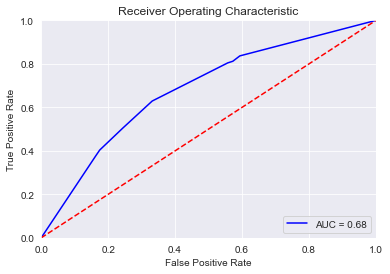

In [30]:
# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

# Precision
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Observaciones:
- Al modelo le cuesta detectar las clases (hay mucho falsos positivos y negativos).

## Gradient Boosting Classifier

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
# Se definen X e y
X = BTC_various_indicators_2.drop (['Target'],axis=1)
y = BTC_various_indicators_2 ['Target']

# Dividimos los datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [33]:
# Se crea el modelo Gradient Boosting Classifier
gbrt = GradientBoostingClassifier(random_state = 0)

Se contruye la grilla de RandomizedSearchCV.

In [34]:
# Se definelos hyperparámetros
param_grid = {'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'n_estimators':[100, 1000, 10000],
              'subsample':[0.00001, 0.0001, 0.001, 0.01, 0.1, 0.99],
              'criterion': ['squared_error'],
              'warm_start': [False, True]
              }

# Se uitiliza la RandomizedSearchCV y se agrega Cross validation con k=5 
model = RandomizedSearchCV(gbrt, param_grid, cv=5, verbose=2)

In [35]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=squared_error, learning_rate=100, n_estimators=100, subsample=0.01, warm_start=False; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=100, n_estimators=100, subsample=0.01, warm_start=False; total time=   0.1s
[CV] END criterion=squared_error, learning_rate=100, n_estimators=100, subsample=0.01, warm_start=False; total time=   0.1s
[CV] END criterion=squared_error, learning_rate=100, n_estimators=100, subsample=0.01, warm_start=False; total time=   0.1s
[CV] END criterion=squared_error, learning_rate=100, n_estimators=100, subsample=0.01, warm_start=False; total time=   0.1s
[CV] END criterion=squared_error, learning_rate=1, n_estimators=100, subsample=1e-05, warm_start=False; total time=   0.1s
[CV] END criterion=squared_error, learning_rate=1, n_estimators=100, subsample=1e-05, warm_start=False; total time=   0.1s
[CV] END criterion=squared_error, learning_rate=1, n_estimators=100, subs

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
                   param_distributions={'criterion': ['squared_error'],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1, 10, 100,
                                                          1000],
                                        'n_estimators': [100, 1000, 10000],
                                        'subsample': [1e-05, 0.0001, 0.001,
                                                      0.01, 0.1, 0.99],
                                        'warm_start': [False, True]},
                   verbose=2)

In [36]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'warm_start': False, 'subsample': 0.99, 'n_estimators': 100, 'learning_rate': 0.01, 'criterion': 'squared_error'}
Mejor Score: 0.6642431331506962



In [37]:
#Veamos los resultados obtenidos
scores = pd.DataFrame(model.cv_results_)
scores.sort_values("mean_test_score", ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_warm_start,param_subsample,param_n_estimators,param_learning_rate,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,1.215630,0.052242,0.004126,0.006067,False,0.99,100,0.01,squared_error,"{'warm_start': False, 'subsample': 0.99, 'n_estimators': 100, 'learning_rate': 0.01, 'criterion': 'squared_error'}",0.678733,0.665158,0.659864,0.655329,0.662132,0.664243,0.007923,1
5,12.145352,0.193775,0.008651,0.007186,True,0.99,1000,0.0001,squared_error,"{'warm_start': True, 'subsample': 0.99, 'n_estimators': 1000, 'learning_rate': 0.0001, 'criterion': 'squared_error'}",0.624434,0.604072,0.619048,0.560091,0.598639,0.601257,0.022641,2
4,0.062485,0.000026,0.000000,0.000000,False,0.00001,100,0.01,squared_error,"{'warm_start': False, 'subsample': 1e-05, 'n_estimators': 100, 'learning_rate': 0.01, 'criterion': 'squared_error'}",0.520362,0.520362,0.521542,0.521542,0.521542,0.521070,0.000578,3
1,0.138338,0.048752,0.003591,0.001353,False,0.00001,100,1,squared_error,"{'warm_start': False, 'subsample': 1e-05, 'n_estimators': 100, 'learning_rate': 1, 'criterion': 'squared_error'}",0.479638,0.479638,0.521542,0.521542,0.521542,0.504780,0.020529,4
3,0.074974,0.006243,0.000000,0.000000,False,0.001,100,1,squared_error,"{'warm_start': False, 'subsample': 0.001, 'n_estimators': 100, 'learning_rate': 1, 'criterion': 'squared_error'}",0.479638,0.479638,0.521542,0.521542,0.521542,0.504780,0.020529,4


In [38]:
# Se ejecuta la predicción de resultados con X_test
predictions = model.predict(X_test)

In [39]:
# Accuracy
print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.6494565217391305


In [40]:
cm = confusion_matrix(y_test,predictions)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[202 130]
 [128 276]]


Accuracy of the classifier is: 0.6494565217391305
Precision Score of the classifier is: 0.6798029556650246
Recall Score of the classifier is: 0.6831683168316832
F1 Score of the classifier is: 0.6814814814814815
AUC for our classifier is: 0.7015872897530717


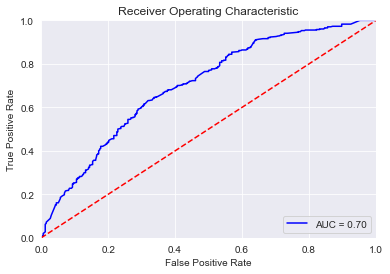

In [41]:
# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

# Precision
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Observaciones:
- Al modelo le cuesta detectar las clases (hay mucho falsos positivos y negativos).

## XG Boost

In [42]:
import xgboost as xgb

In [43]:
# Se definen X e y
X = BTC_various_indicators_2.drop (['Target'],axis=1)
y = BTC_various_indicators_2 ['Target']

# Dividimos los datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [44]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=1000,seed=123)

Se contruye la grilla de RandomizedSearchCV.

In [45]:
# Se definelos hyperparámetros
param_grid = {'booster':['gbtree', 'gblinear','dart', 'gbtree and dart'],
              'verbosity':[2],
              'validate_parameters':[True, False],
              'scale_pos_weight':np.arange(1,100,1)
              }

# Se uitiliza la RandomizedSearchCV y se agrega Cross validation con k=5 
model = RandomizedSearchCV(clf_xgb, param_grid, n_iter=10, cv=5, verbose=2)

In [46]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END booster=gbtree and dart, scale_pos_weight=68, validate_parameters=True, verbosity=2; total time=   0.0s
[CV] END booster=gbtree and dart, scale_pos_weight=68, validate_parameters=True, verbosity=2; total time=   0.0s
[CV] END booster=gbtree and dart, scale_pos_weight=68, validate_parameters=True, verbosity=2; total time=   0.0s
[CV] END booster=gbtree and dart, scale_pos_weight=68, validate_parameters=True, verbosity=2; total time=   0.0s
[CV] END booster=gbtree and dart, scale_pos_weight=68, validate_parameters=True, verbosity=2; total time=   0.0s
[22:37:19] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[22:37:19] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\gbm\gbtree.cc:904: drop 0 trees, weight = 1
[22:37:19] WARNING: C:\Windows\Temp\abs_557

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                        'scale_pos_weight': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'validate_parameters': [True, False],
                                        'verbosity': [2]},
                   verbose=2)

In [47]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'verbosity': 2, 'validate_parameters': False, 'scale_pos_weight': 58, 'booster': 'dart'}
Mejor Score: 0.6506736027744431



In [48]:
#Veamos los resultados obtenidos
scores = pd.DataFrame(model.cv_results_)
scores.sort_values("mean_test_score", ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_verbosity,param_validate_parameters,param_scale_pos_weight,param_booster,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,100.470674,2.185770,0.299929,0.054473,2,False,58,dart,"{'verbosity': 2, 'validate_parameters': False, 'scale_pos_weight': 58, 'booster': 'dart'}",0.628959,0.635747,0.655329,0.673469,0.659864,0.650674,0.016249,1
7,5.546824,0.230266,0.012477,0.006238,2,False,55,gbtree,"{'verbosity': 2, 'validate_parameters': False, 'scale_pos_weight': 55, 'booster': 'gbtree'}",0.642534,0.626697,0.657596,0.657596,0.648526,0.646590,0.011474,2
4,0.532035,0.011661,0.006249,0.007653,2,True,7,gblinear,"{'verbosity': 2, 'validate_parameters': True, 'scale_pos_weight': 7, 'booster': 'gblinear'}",0.558824,0.572398,0.557823,0.546485,0.564626,0.560031,0.008531,3
5,0.530579,0.006375,0.009374,0.007654,2,False,20,gblinear,"{'verbosity': 2, 'validate_parameters': False, 'scale_pos_weight': 20, 'booster': 'gblinear'}",0.538462,0.545249,0.544218,0.535147,0.537415,0.540098,0.003947,4
8,0.532112,0.007315,0.012498,0.006249,2,False,67,gblinear,"{'verbosity': 2, 'validate_parameters': False, 'scale_pos_weight': 67, 'booster': 'gblinear'}",0.529412,0.533937,0.532880,0.530612,0.528345,0.531037,0.002092,5


In [49]:
# Se ejecuta la predicción de resultados con X_test
predictions = model.predict(X_test)

In [50]:
# Accuracy
print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.6195652173913043


In [51]:
cm = confusion_matrix(y_test,predictions)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[144 188]
 [ 92 312]]


Accuracy of the classifier is: 0.6195652173913043
Precision Score of the classifier is: 0.624
Recall Score of the classifier is: 0.7722772277227723
F1 Score of the classifier is: 0.6902654867256638
AUC for our classifier is: 0.6708032625551713


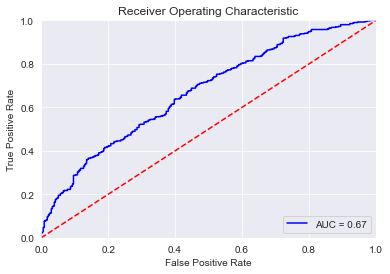

In [52]:
# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

# Precision
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Observaciones:
- Al modelo le cuesta detectar las clases (hay mucho falsos positivos y negativos). 

## LightGBM

In [53]:
import lightgbm as lgb

In [54]:
# Se definen X e y
X = BTC_various_indicators_2.drop (['Target'],axis=1)
y = BTC_various_indicators_2 ['Target']

# Dividimos los datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [55]:
clf = lgb.LGBMClassifier()

Se contruye la grilla de RandomizedSearchCV.

In [56]:
# Se definelos hyperparámetros
param_grid = {'max_bin':[1, 255, 500, 750, 1000, 10000],
              'precise_float_parser': [True, False]}

# Se uitiliza la RandomizedSearchCV y se agrega Cross validation con k=5 
model = RandomizedSearchCV(clf, param_grid, cv=5, verbose=2)

In [57]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ............max_bin=255, precise_float_parser=False; total time=   0.2s
[CV] END ............max_bin=255, precise_float_parser=False; total time=   0.2s
[CV] END ............max_bin=255, precise_float_parser=False; total time=   0.3s
[CV] END ............max_bin=255, precise_float_parser=False; total time=   0.2s
[CV] END ............max_bin=255, precise_float_parser=False; total time=   0.2s
[CV] END .............max_bin=500, precise_float_parser=True; total time=   0.3s
[CV] END .............max_bin=500, precise_float_parser=True; total time=   0.3s
[CV] END .............max_bin=500, precise_float_parser=True; total time=   0.3s
[CV] END .............max_bin=500, precise_float_parser=True; total time=   0.3s
[CV] END .............max_bin=500, precise_float_parser=True; total time=   0.3s
[CV] END ............max_bin=500, precise_float_parser=False; total time=   0.2s
[CV] END ............max_bin=500, precise_float_

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(),
                   param_distributions={'max_bin': [1, 255, 500, 750, 1000,
                                                    10000],
                                        'precise_float_parser': [True, False]},
                   verbose=2)

In [58]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'precise_float_parser': True, 'max_bin': 500}
Mejor Score: 0.6615292270754456



In [59]:
#Veamos los resultados obtenidos
scores = pd.DataFrame(model.cv_results_)
scores.sort_values("mean_test_score", ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_precise_float_parser,param_max_bin,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.383332,0.022857,0.005318,0.005714,True,500,"{'precise_float_parser': True, 'max_bin': 500}",0.653846,0.674208,0.648526,0.659864,0.671202,0.661529,0.009851,1
2,0.376215,0.043785,0.003124,0.006248,False,500,"{'precise_float_parser': False, 'max_bin': 500}",0.653846,0.674208,0.648526,0.659864,0.671202,0.661529,0.009851,1
3,0.419909,0.029512,0.003124,0.006249,False,1000,"{'precise_float_parser': False, 'max_bin': 1000}",0.651584,0.649321,0.634921,0.659864,0.664399,0.652018,0.010145,3
0,0.316727,0.044850,0.007314,0.005076,False,255,"{'precise_float_parser': False, 'max_bin': 255}",0.653846,0.644796,0.616780,0.673469,0.653061,0.648391,0.018399,4
7,0.246240,0.007993,0.005385,0.001018,True,255,"{'precise_float_parser': True, 'max_bin': 255}",0.653846,0.644796,0.616780,0.673469,0.653061,0.648391,0.018399,4


In [60]:
# Se ejecuta la predicción de resultados con X_test
predictions = model.predict(X_test)

In [61]:
# Accuracy
print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.6385869565217391


In [62]:
cm = confusion_matrix(y_test,predictions)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[212 120]
 [146 258]]


Accuracy of the classifier is: 0.6385869565217391
Precision Score of the classifier is: 0.6825396825396826
Recall Score of the classifier is: 0.6386138613861386
F1 Score of the classifier is: 0.659846547314578
AUC for our classifier is: 0.7014419062388167


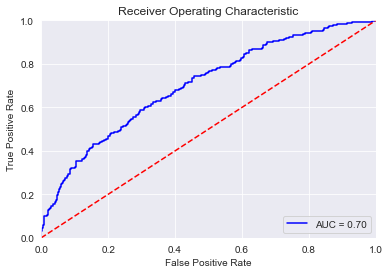

In [63]:
# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

# Precision
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Observaciones:
- Al modelo le cuesta detectar las clases (hay mucho falsos positivos y negativos). 

## HistGradientBoostingClassifier

In [66]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [64]:
# Se definen X e y
X = BTC_various_indicators_2.drop (['Target'],axis=1)
y = BTC_various_indicators_2 ['Target']

# Dividimos los datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [67]:
Dt = HistGradientBoostingClassifier().fit(X_train, y_train)

In [68]:
Dt.score(X_test, y_test)

0.6494565217391305

Se buscará hypertunear este modelo

In [69]:
HGBC = HistGradientBoostingClassifier()

Se contruye la grilla de RandomizedSearchCV.

In [71]:
# Se definelos hyperparámetros
param_grid = {'loss':['log_loss', 'auto', 'binary_crossentropyv', 'categorical_crossentropy'],
              'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'max_iter': [100,1000,10000],
              'max_leaf_nodes': [1,15,31,65,90,150],
              'l2_regularization': [0, 1, 5, 10, 50,100],
              'warm_start': [False]}

# Se uitiliza la RandomizedSearchCV y se agrega Cross validation con k=5 
model = RandomizedSearchCV(HGBC, param_grid, n_iter=10, cv=5, verbose=2)

In [72]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END l2_regularization=50, learning_rate=0.01, loss=binary_crossentropyv, max_iter=100, max_leaf_nodes=150, warm_start=False; total time=   0.0s
[CV] END l2_regularization=50, learning_rate=0.01, loss=binary_crossentropyv, max_iter=100, max_leaf_nodes=150, warm_start=False; total time=   0.0s
[CV] END l2_regularization=50, learning_rate=0.01, loss=binary_crossentropyv, max_iter=100, max_leaf_nodes=150, warm_start=False; total time=   0.0s
[CV] END l2_regularization=50, learning_rate=0.01, loss=binary_crossentropyv, max_iter=100, max_leaf_nodes=150, warm_start=False; total time=   0.0s
[CV] END l2_regularization=50, learning_rate=0.01, loss=binary_crossentropyv, max_iter=100, max_leaf_nodes=150, warm_start=False; total time=   0.0s
[CV] END l2_regularization=0, learning_rate=0.0001, loss=binary_crossentropyv, max_iter=1000, max_leaf_nodes=65, warm_start=False; total time=   0.0s
[CV] END l2_regularization=0, learning_rate=

RandomizedSearchCV(cv=5, estimator=HistGradientBoostingClassifier(),
                   param_distributions={'l2_regularization': [0, 1, 5, 10, 50,
                                                              100],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1, 10, 100,
                                                          1000],
                                        'loss': ['log_loss', 'auto',
                                                 'binary_crossentropyv',
                                                 'categorical_crossentropy'],
                                        'max_iter': [100, 1000, 10000],
                                        'max_leaf_nodes': [1, 15, 31, 65, 90,
                                                           150],
                                        'warm_start': [False]},
                   verbose=2)

In [73]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'warm_start': False, 'max_leaf_nodes': 90, 'max_iter': 100, 'loss': 'auto', 'learning_rate': 1000, 'l2_regularization': 5}
Mejor Score: 0.6465704230410113



In [74]:
#Veamos los resultados obtenidos
scores = pd.DataFrame(model.cv_results_)
scores.sort_values("mean_test_score", ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_warm_start,param_max_leaf_nodes,param_max_iter,param_loss,param_learning_rate,param_l2_regularization,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.146405,0.010120,0.009373,0.007653,False,90,100,auto,1000,5,"{'warm_start': False, 'max_leaf_nodes': 90, 'max_iter': 100, 'loss': 'auto', 'learning_rate': 1000, 'l2_regularization': 5}",0.656109,0.656109,0.630385,0.673469,0.616780,0.646570,0.020273,1
6,16.455738,0.163683,0.056235,0.007653,False,90,1000,log_loss,1,1,"{'warm_start': False, 'max_leaf_nodes': 90, 'max_iter': 1000, 'loss': 'log_loss', 'learning_rate': 1, 'l2_regularization': 1}",0.624434,0.631222,0.630385,0.664399,0.666667,0.643421,0.018219,2
2,9.260694,0.226196,0.435022,0.033105,False,90,10000,auto,10,0,"{'warm_start': False, 'max_leaf_nodes': 90, 'max_iter': 10000, 'loss': 'auto', 'learning_rate': 10, 'l2_regularization': 0}",0.400452,0.484163,0.496599,0.392290,0.448980,0.444497,0.042364,3
5,9.315368,0.358171,0.414371,0.012127,False,90,10000,log_loss,100,10,"{'warm_start': False, 'max_leaf_nodes': 90, 'max_iter': 10000, 'loss': 'log_loss', 'learning_rate': 100, 'l2_regularization': 10}",0.377828,0.384615,0.426304,0.351474,0.643991,0.436842,0.106320,4
0,0.002992,0.001545,0.000000,0.000000,False,150,100,binary_crossentropyv,0.01,50,"{'warm_start': False, 'max_leaf_nodes': 150, 'max_iter': 100, 'loss': 'binary_crossentropyv', 'learning_rate': 0.01, 'l2_regularization': 50}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [75]:
# Se ejecuta la predicción de resultados con X_test
predictions = model.predict(X_test)

In [76]:
# Accuracy
print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.6317934782608695


In [77]:
cm = confusion_matrix(y_test,predictions)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[228 104]
 [167 237]]


Accuracy of the classifier is: 0.6317934782608695
Precision Score of the classifier is: 0.6950146627565983
Recall Score of the classifier is: 0.5866336633663366
F1 Score of the classifier is: 0.6362416107382549
AUC for our classifier is: 0.6781730883931767


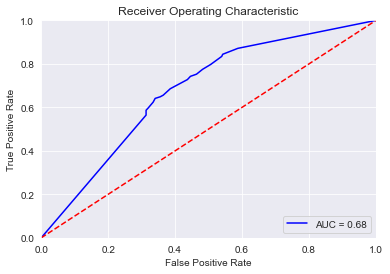

In [78]:
# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

# Precision
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Observaciones:
- Al modelo le cuesta detectar las clases (hay mucho falsos positivos y negativos). 